# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
nhanes = pd.read_csv("nhanes_data_17_18.csv")


/var/folders/2q/0pm84ptn56b3zt11wj9sryf80000gn/T/ipykernel_87179/2932092925.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("nhanes_data_17_18.csv")


In [32]:
nhanes[['GeneralHealthCondition', 'HowOftenAddSaltToFoodAtTable']].isnull().sum() 
#Number of missing values
table = pd.crosstab(
    nhanes['GeneralHealthCondition'],
    nhanes['HowOftenAddSaltToFoodAtTable']
)
print(table)

HowOftenAddSaltToFoodAtTable  Occasionally  Rarely  Very often
GeneralHealthCondition                                        
Excellent                              113     237          67
Fair or                                188     419         166
Good                                   486     840         310
Poor?                                   37      46          28
Very good                              350     590         146


The  table shows that Rarely adding salt is the most common behavior across all health groups, especially among those reporting Excellent or Very good health. But individuals with Poor or Fair health are more likely to report adding salt often.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

<Axes: xlabel='WeightKg', ylabel='Density'>

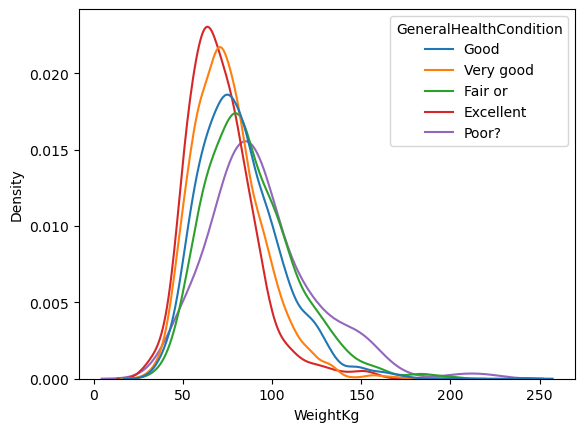

In [33]:
nhanes[['GeneralHealthCondition', 'WeightKg']].isnull().sum() #Missing values
sns.kdeplot(data=nhanes, x="WeightKg", hue="GeneralHealthCondition", common_norm=False)

Individuals in Excellent or Very good health have lower  weights, while thoes with poor health have  higher weights with greater variability.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

Computed bandwidth is: 4.254019151505208


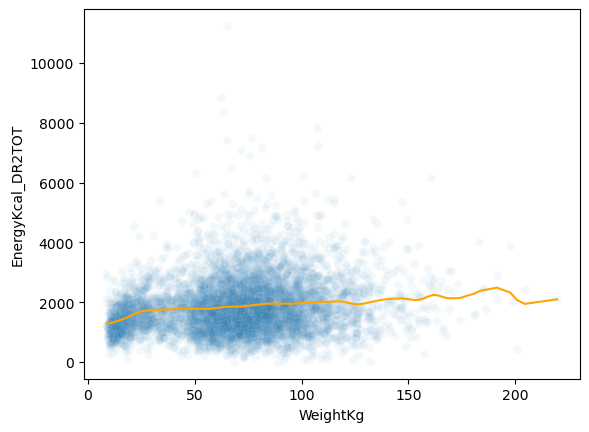

In [38]:
x = nhanes [ 'WeightKg']
y = nhanes['EnergyKcal_DR2TOT']
def lcls (x,y, h = None, plot=True) :
    #n = len(x)
    
    mask= (~x.isna ( ))&(~y.isna())
    x = x [mask]
    y = y [mask]
    
    grid = np. sort(x.unique())

    if h is None:
        iqr = np.quantile(x,.75) - np.quantile (x,.25)
        h = 0.9 * min (np.std(x), iqr/1.34) * len (x) **(-0.2)
        print(f'Computed bandwidth is: {h}')
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape (1, -1) ) **2
    K = np.exp (I/(2*h**2) )/np.sqrt (2*np.pi*h**2 )

    numerator = y@K
    denominator = np.sum (K,axis=0)
    y_hat = numerator/denominator  

    if plot:
        sns.scatterplot(data=nhanes, y='EnergyKcal_DR2TOT', x='WeightKg' ,alpha=.05)
        sns. lineplot(x=grid,y=y_hat, color='orange')
    return y_hat, grid
y_hat, grid = lcls (x,y) 


<Axes: xlabel='WeightKg', ylabel='EnergyKcal_DR2TOT'>

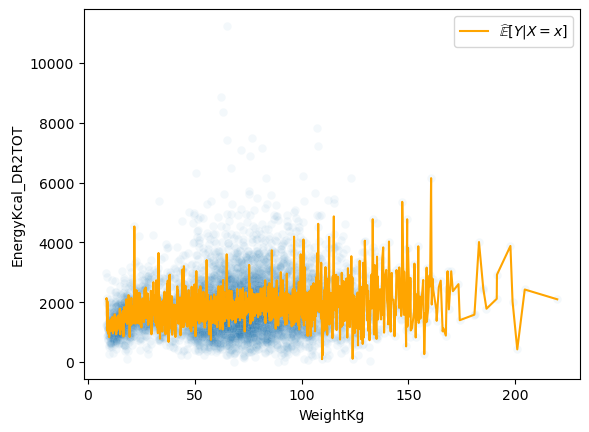

In [39]:

sns.scatterplot(data=nhanes, y='EnergyKcal_DR2TOT', x='WeightKg',alpha=.05)
means = nhanes.loc[:,['EnergyKcal_DR2TOT','WeightKg']].groupby('WeightKg').mean()
sns.lineplot(data=means, x='WeightKg',y='EnergyKcal_DR2TOT',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

I think that its plausible casual that weight has an effect on the amount of calories consumed since more calories are need to sustain higher body weights. However a CEF captures correlation, not necessarily causation. The observed positive slope is consistent with a causal effect of weight on calorie intake, but omitted variables present threats to causal identification. The CEF is always valid for predicting X and Y, it only becomes problematic if you try to interpret it causally. 